Fitting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import pandas as np
#data = pd.read_csv('/content/drive/Mydrive/data/fitting_data1.txt')

In [ ]:
import numpy as np
fname = '/content/drive/MyDrive/data/fitting_data1.txt'
data = np.genfromtxt(fname)
print(data)
type(data)

[[ 0.      1.7857]
 [ 1.      2.664 ]
 [ 2.      5.6425]
 [ 3.      6.0834]
 [ 4.      8.2153]
 [ 5.     11.1901]]


numpy.ndarray

In [ ]:
print(data.shape)
y1 = data[:,1]
x = data.T[0]
y2 = data.T[1]
print(y1, y2, sep='\n')

(6, 2)
[ 1.7857  2.664   5.6425  6.0834  8.2153 11.1901]
[ 1.7857  2.664   5.6425  6.0834  8.2153 11.1901]


In [ ]:
data.T

array([[ 0.    ,  1.    ,  2.    ,  3.    ,  4.    ,  5.    ],
       [ 1.7857,  2.664 ,  5.6425,  6.0834,  8.2153, 11.1901]])

In [ ]:
x = data.T[0]
y = data.T[1]
print("x", x, "y", y)

x [0. 1. 2. 3. 4. 5.] y [ 1.7857  2.664   5.6425  6.0834  8.2153 11.1901]


x [0.0238 0.1561 0.232  0.269  0.3009 0.3449 0.4932 0.4901 0.5693 0.665
 0.7032 0.8302 0.8638 0.9298 1.0397 1.1085 1.1089 1.1544 1.2874 1.3152
 1.3574 1.4334 1.5334 1.5714 1.6478 1.7694 1.8083 1.8419 1.9198 2.0591
 2.0347 2.1659 2.234  2.3053 2.3629 2.4513 2.5229 2.5732 2.5942 2.7167
 2.7403 2.8638 2.9045 2.9238 3.0741 3.0971 3.2129 3.1905 3.265  3.3976
 3.394  3.5028 3.607  3.6351 3.68   3.8132 3.8073 3.8932 3.9539 4.0464]
y [ 0.5197  1.1197  1.0142  0.947   0.3945  0.8887  1.2394  1.3087  1.1312
  0.8557  0.9329  1.5263  1.6872  1.4226  2.0903  2.1295  2.4538  2.4584
  3.1786  2.502   3.4009  3.8544  3.9765  3.609   4.0677  5.1936  5.4951
  5.7421  6.4991  7.6476  7.5167  8.1405  9.02    9.4689 10.3661 11.1125
 11.9153 12.2709 12.7583 14.449  14.5259 15.5956 16.1035 16.9563 18.7821
 19.0833 21.4439 21.0642 22.1939 23.9632 24.1848 26.0584 27.6167 28.5035
 29.774  31.4848 31.5508 33.4284 35.1955 36.874 ]


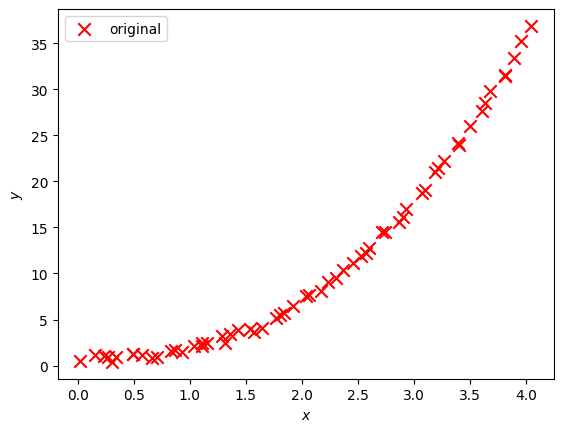

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(data_num):
    fname = f'/content/drive/MyDrive/data/fitting_data{data_num}.txt'
    data = np.loadtxt(fname)
    x, y = data.T
    return x, y

def plot_data(ax, x, y):
    ax.scatter(x, y, label = 'original', marker = 'x', s = 80, color = 'red')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.legend()

x, y = read_data(4) # 데이터 고르기
print("x", x)
print("y", y)

fig = plt.figure()
ax = fig.add_subplot()
plot_data(ax, x, y)
plt.show()

In [ ]:
x, y

(array([0., 1., 2., 3., 4., 5.]),
 array([ 1.7857,  2.664 ,  5.6425,  6.0834,  8.2153, 11.1901]))

[-6.316374    8.62987273] (2,)


array([ 1.80678034, -3.19814599,  2.89055986])

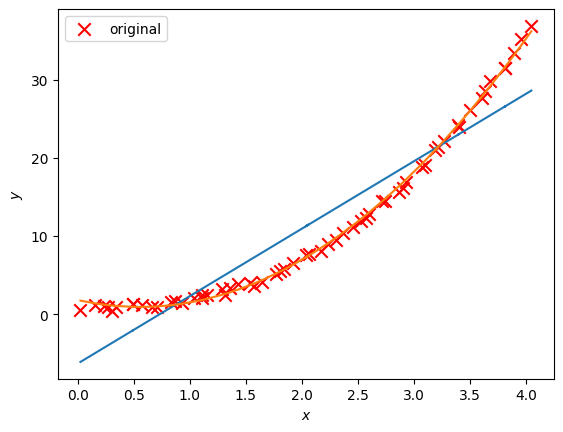

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plot_data(ax, x, y) # 위에서 함수 정의가 안됨

fit = np.polynomial.polynomial.polyfit(x, y, 1) # ploynomial = 다항식
print(fit, fit.shape)
b, a = fit # 뒤에 올수록 고차항
# ax.plot(x, fit[0] + x * fit[1])
ax.plot(x, a*x + b)

fit = np.polynomial.polynomial.polyfit(x, y, 2)
c, b, a = fit
# ax.plot(x, a*x*x + b*x + c) 아래와 같은 코드이다.
ax.plot(x, np.polynomial.polynomial.polyval(x, fit))
fit

In [ ]:
from scipy import stats
res = stats.linregress(x, y)
print(res)
print(res.slope, res.intercept)

LinregressResult(slope=1.8319085714285714, intercept=1.3503952380952375, rvalue=0.9824949053628079, pvalue=0.0004569604788552228, stderr=0.1736727829259714, intercept_stderr=0.5258204627229142)
1.8319085714285714 1.3503952380952375


In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a + b*x + c*x*x

popt, pcov = curve_fit(func, x, y)
print(popt, pcov, sep='\n')
print(func(x, *popt))
# print(func(x, popt[0], popt[1], popt[2])) 위와 같은 코드

[1.77278214 1.19832821 0.12671607]
[[ 0.41397167 -0.29697969  0.04499692]
 [-0.29697969  0.36627498 -0.06749539]
 [ 0.04499692 -0.06749539  0.01349908]]
[ 1.77278214  3.09782643  4.67630286  6.50821143  8.59355214 10.932325  ]
[ 1.77278214  3.09782643  4.67630286  6.50821143  8.59355214 10.932325  ]


LinregressResult(slope=2.211910894546808, intercept=0.45887079894285754, rvalue=0.9964311616181989, pvalue=8.297758927407977e-48, stderr=0.02857437299795867, intercept_stderr=0.02713533944381277)


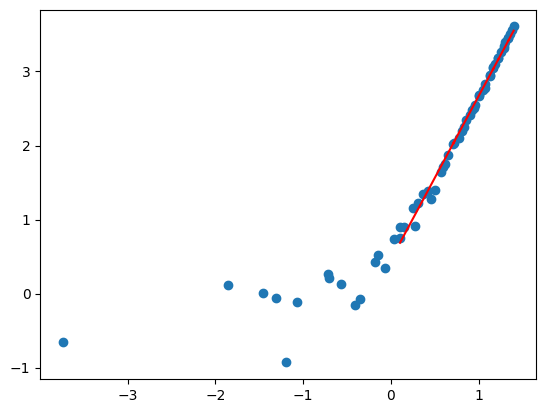

In [ ]:
from scipy import stats
start = 15
res = stats.linregress(np.log(x[start:]), np.log(y[start:]))
print(res)

b = res.slope
a = np.exp(res.intercept)

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(np.log(x), np.log(y))
ax1.plot(np.log(x[start:]), np.log(a*(x[start:]**b)), color='red')

plt.show()

LinregressResult(slope=0.9528577354952098, intercept=-0.05092544930223131, rvalue=0.9912100747407399, pvalue=2.056090754542367e-39, stderr=0.019394530032426735, intercept_stderr=0.05238948810059144)


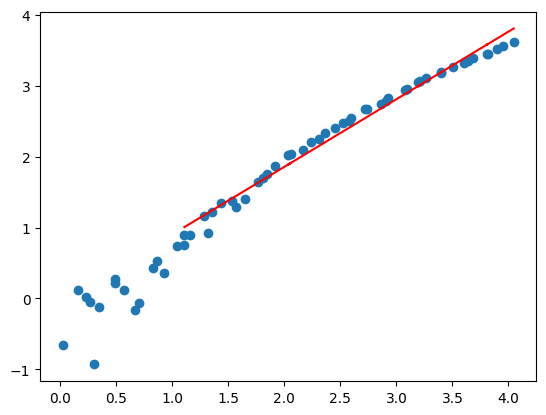

In [ ]:
from scipy import stats
start = 15
res = stats.linregress((x[start:]), np.log(y[start:]))
print(res)

b = np.exp(res.slope)
a = np.exp(res.intercept)

fig = plt.figure()
ax2 = fig.add_subplot()
ax2.scatter(x, np.log(y))
ax2.plot(x[start:], np.log(a*( b ** x[start:]) ), color='red')

plt.show()